<a href="https://colab.research.google.com/github/mteoraso/mteoraso/blob/main/Practica_Time_Serie_Forecasting_CO2_Concentration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Cargar dataset de concentracion de Co2

In [2]:
data=sm.datasets.co2.load_pandas().data

In [3]:
data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


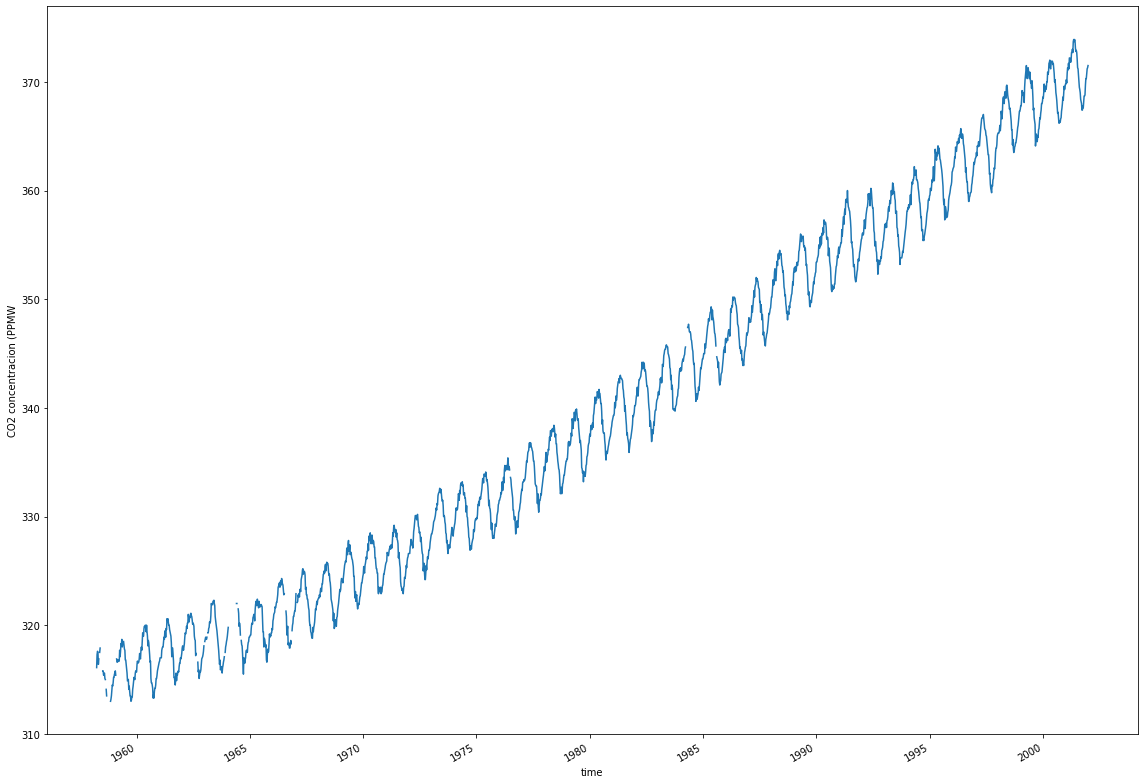

In [5]:
fig, ax = plt.subplots(figsize=(16, 11))

ax.plot(data['co2'])
ax.set_xlabel('time')
ax.set_ylabel('CO2 concentracion (PPMW')

fig.autofmt_xdate()
plt.tight_layout()

In [6]:
data=data.interpolate()

In [7]:
data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [9]:
df=data.copy()
df['y']=df['co2'].shift(-1)
df

,co2,y
1958-03-29,316.1,317.3
1958-04-05,317.3,317.6
1958-04-12,317.6,317.5
1958-04-19,317.5,316.4
1958-04-26,316.4,316.9
...,...,...
2001-12-01,370.3,370.8
2001-12-08,370.8,371.2
2001-12-15,371.2,371.3
2001-12-22,371.3,371.5


In [10]:
train=df[:-104]
test=df[-104:]
test=test.drop(test.tail(1).index)

In [11]:
train

,co2,y
1958-03-29,316.1,317.3
1958-04-05,317.3,317.6
1958-04-12,317.6,317.5
1958-04-19,317.5,316.4
1958-04-26,316.4,316.9
...,...,...
1999-12-04,367.4,368.0
1999-12-11,368.0,368.0
1999-12-18,368.0,368.2
1999-12-25,368.2,368.6


In [12]:
test

,co2,y
2000-01-08,368.5,369.0
2000-01-15,369.0,369.8
2000-01-22,369.8,369.2
2000-01-29,369.2,369.1
2000-02-05,369.1,369.6
...,...,...
2001-11-24,370.3,370.3
2001-12-01,370.3,370.8
2001-12-08,370.8,371.2
2001-12-15,371.2,371.3


In [14]:
test=test.copy()
test['baseline_pred']=test['co2']
test

,co2,y,baseline_pred
2000-01-08,368.5,369.0,368.5
2000-01-15,369.0,369.8,369.0
2000-01-22,369.8,369.2,369.8
2000-01-29,369.2,369.1,369.2
2000-02-05,369.1,369.6,369.1
...,...,...,...
2001-11-24,370.3,370.3,370.3
2001-12-01,370.3,370.8,370.3
2001-12-08,370.8,371.2,370.8
2001-12-15,371.2,371.3,371.2


Contruyendo modelo Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

X_train=train['co2'].values.reshape(-1,1)
y_train=train['y'].values.reshape(-1,1)
X_test=test['co2'].values.reshape(-1,1)

## Inicializando el modelo
dt_reg=DecisionTreeRegressor(random_state=42)

## Ajustando modelo
dt_reg.fit(X=X_train, y=y_train)

## Haciendo precciones
dt_pred=dt_reg.predict(X_test)

## Asignando predicciones a una nueva columna en prueba
test['dt_pred']=dt_pred

In [18]:
test

,co2,y,baseline_pred,dt_pred
2000-01-08,368.5,369.0,368.5,368.650000
2000-01-15,369.0,369.8,369.0,368.500000
2000-01-22,369.8,369.2,369.8,369.400000
2000-01-29,369.2,369.1,369.2,369.100000
2000-02-05,369.1,369.6,369.1,368.800000
...,...,...,...,...
2001-11-24,370.3,370.3,370.3,370.533333
2001-12-01,370.3,370.8,370.3,370.533333
2001-12-08,370.8,371.2,370.8,370.800000
2001-12-15,371.2,371.3,371.2,371.000000


Construyendo modelo Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred=gbr.predict(X_test)

test['gbr_pred']=gbr_pred

In [20]:
test

,co2,y,baseline_pred,dt_pred,gbr_pred
2000-01-08,368.5,369.0,368.5,368.650000,368.556464
2000-01-15,369.0,369.8,369.0,368.500000,368.774435
2000-01-22,369.8,369.2,369.8,369.400000,369.512468
2000-01-29,369.2,369.1,369.2,369.100000,369.041813
2000-02-05,369.1,369.6,369.1,368.800000,368.774435
...,...,...,...,...,...
2001-11-24,370.3,370.3,370.3,370.533333,370.535661
2001-12-01,370.3,370.8,370.3,370.533333,370.535661
2001-12-08,370.8,371.2,370.8,370.800000,370.710834
2001-12-15,371.2,371.3,371.2,371.000000,371.049344


Evaluando performance de ambos modelos

In [23]:
## Se crea función para evaluar el error promedio porcentual (MAPE)
def mape(y_true, y_pred):
  return round(np.mean(np.abs((y_true-y_pred)/y_true))*100, 2)

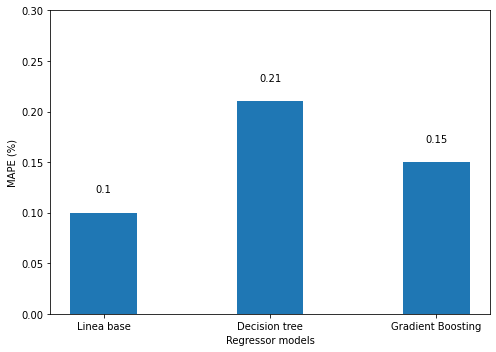

In [27]:
baseline_mape=mape(test['y'], test['baseline_pred'])
dt_mape=mape(test['y'], test['dt_pred'])
gbr_mape=mape(test['co2'], test['gbr_pred'])

## Generar grafico
fig, ax=plt.subplots(figsize=(7,5))

x=['Linea base', 'Decision tree', 'Gradient Boosting']
y=[baseline_mape, dt_mape, gbr_mape]

ax.bar(x,y,width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 0.3)

for index, value in enumerate(y):
  plt.text(x=index, y=value + 0.02, s=str(value), ha='center')

plt.tight_layout()